In [1]:
import numpy as np
import pandas as pd


In [31]:
df = pd.read_csv("../../Downloads/Data for ML/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Let's check if there is any missing values in the column. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Let's see the statistical analysis of numerical features.

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Check for the duplication. 

In [14]:
df.duplicated().sum()

0

Let's see if the dataset is balanced or imbalanced. 

In [23]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

This is an imbalanced dataset. 
Now let's see if the categorical features are balanced or not.  

In [16]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [17]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

Here, we just want to see the use of keras. So, we are not considering the problem arising because of imbalanced dataset.  

Let's drop the features which are not useful. 

In [32]:
df.drop(columns=['RowNumber', 'Surname', 'CustomerId'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Here, we should perform EDA and eliminate the features which are not necessary. But our goal is to use Keras and train a NN. So, we are not performing EDA.
Now let's transform the categorical features into numerical features. --> Using one hot encoding. (Using pandas)

In [33]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=float)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


The value of some features are too big it can slow down the convergence of weights of NN. So, we need to scale them.  

In [37]:
X = df.drop(columns=['Exited'])
Y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)

(8000, 11)
(2000, 11)


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
print(X_train_sc)

[[ 1.78974378  0.94394225  1.04271518 ...  1.73436329 -0.57388614
   0.91255717]
 [ 0.26040483  2.35932486 -0.35053238 ... -0.57658047  1.74250594
  -1.09582175]
 [-0.22526362 -0.47144036  0.3460914  ... -0.57658047  1.74250594
   0.91255717]
 ...
 [-1.97160337  0.09471269  0.3460914  ...  1.73436329 -0.57388614
  -1.09582175]
 [ 0.60140608 -0.47144036 -1.04715616 ... -0.57658047 -0.57388614
  -1.09582175]
 [ 0.21907135  0.09471269  1.73933896 ...  1.73436329 -0.57388614
   0.91255717]]


Using tensorflow. 

In [40]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

/Users/fnuarjun/PycharmProjects/ML/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Here we are using sequential model.
Architecture of NN:
--> 3 perceptron into one hidden layer. -> Using "sigmoid" activation function.  
--> 1 output layer. 

In [41]:
model = Sequential()

model.add(Dense(3, input_dim=11, activation='sigmoid')) # hidden layer
model.add(Dense(1, activation='sigmoid'))

Let see the number of parameters and summary of the model.

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We want to compile our model using:
--> Loss function: Binary cross entropy
--> Optimizer: Adam

In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam')

Now, let's fit our training data to the model. --> Training the model

In [46]:
model.fit(X_train_sc, Y_train, epochs=10)

Epoch 1/10
250/250 [==============================] - 0s 368us/step - loss: 0.6700
Epoch 2/10
250/250 [==============================] - 0s 353us/step - loss: 0.5461
Epoch 3/10
250/250 [==============================] - 0s 362us/step - loss: 0.4947
Epoch 4/10
250/250 [==============================] - 0s 399us/step - loss: 0.4719
Epoch 5/10
250/250 [==============================] - 0s 380us/step - loss: 0.4596
Epoch 6/10
250/250 [==============================] - 0s 349us/step - loss: 0.4512
Epoch 7/10
250/250 [==============================] - 0s 349us/step - loss: 0.4446
Epoch 8/10
250/250 [==============================] - 0s 353us/step - loss: 0.4391
Epoch 9/10
250/250 [==============================] - 0s 653us/step - loss: 0.4346
Epoch 10/10
250/250 [==============================] - 0s 587us/step - loss: 0.4309


The weights and biases for the first layer. 

In [47]:
model.layers[0].get_weights()   # Total 33 weights and 3 biases in the first layer.

[array([[-0.11651448, -0.40221637, -0.01908217],
        [ 0.8602861 ,  0.7049433 , -1.1198798 ],
        [ 0.048922  ,  0.3433859 ,  0.09883408],
        [ 0.86967874,  0.2398837 , -0.06991245],
        [ 0.18579638, -0.88316137,  0.06132692],
        [-0.16512227,  0.14099121,  0.08413534],
        [-0.6981469 , -0.19058901,  0.8307913 ],
        [ 0.13097702,  0.08085202, -0.10598651],
        [ 0.18833661,  0.11817122, -0.7885356 ],
        [-0.49537206, -0.32847008, -0.0953021 ],
        [-0.22503601, -0.4501199 ,  0.43888867]], dtype=float32),
 array([-0.42235166, -0.4728838 ,  0.6714657 ], dtype=float32)]

Now we want to predict the output of test data set. 
--> Here we will get the probability values because we are using the sigmoid function. 
--> We can set the threshold by plotting ROC and AOC curve. But here let assume we are using 0.5 as a threshold.

In [48]:
model.predict(X_test_sc)

63/63 [==============================] - 0s 302us/step


array([[0.38284758],
       [0.2564657 ],
       [0.3523803 ],
       ...,
       [0.15379709],
       [0.3624041 ],
       [0.1050334 ]], dtype=float32)

In [49]:
y_log = model.predict(X_test_sc)

y_pred = np.where(y_log > 0.5, 1, 0)
print(y_pred)

63/63 [==============================] - 0s 296us/step
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


Now the accuracy of the model. 

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.797


Now it's time to improve the model. 
--> Change the activation function from sigmoid to ReLu.
--> Increase the number of nodes in the hidden layer. 
--> Increase the number of hidden layers. (W/O over-fitting)
--> Increase the number of epochs.

Other things you want in the code:
--> In each epoch I want to see the accuracy on validation data. --> Here we are using the validation_split which will split our training data and calculate the accuracy on the validation data.
--> If the training accuracy is only increasing and the validation accuracy is not increasing than that's the case of over-fitting.  
--> I also want to plot the graph between the test_loss and validation_loss. 

In [61]:
def model_predict(nodes_1: int, nodes_2: int, nodes_3:int, function: str, epoch:int) -> tuple[float, dict[float]]:
    model1 = Sequential()
    model1.add(Dense(nodes_1, input_dim=11, activation=function))
    model1.add(Dense(nodes_2, activation=function))
    model1.add(Dense(nodes_3, activation='sigmoid'))
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model1.fit(X_train_sc, Y_train, epochs=epoch, validation_split=0.2)
    y_log1 = model1.predict(X_test_sc)
    y_pred1 = np.where(y_log1 > 0.5, 1, 0)
    accuracy1 = accuracy_score(Y_test, y_pred1)*100
    return f"Accuracy = {accuracy1:.2f}%", history

In [62]:
accu, hist = model_predict(11,11,1,'relu', epoch=100)

Epoch 1/100
200/200 [==============================] - 0s 883us/step - loss: 0.5547 - accuracy: 0.7530 - val_loss: 0.4752 - val_accuracy: 0.8131
Epoch 2/100
200/200 [==============================] - 0s 532us/step - loss: 0.4581 - accuracy: 0.7994 - val_loss: 0.4333 - val_accuracy: 0.8112
Epoch 3/100
200/200 [==============================] - 0s 550us/step - loss: 0.4316 - accuracy: 0.8087 - val_loss: 0.4176 - val_accuracy: 0.8131
Epoch 4/100
200/200 [==============================] - 0s 533us/step - loss: 0.4181 - accuracy: 0.8166 - val_loss: 0.4082 - val_accuracy: 0.8119
Epoch 5/100
200/200 [==============================] - 0s 522us/step - loss: 0.4072 - accuracy: 0.8223 - val_loss: 0.3996 - val_accuracy: 0.8156
Epoch 6/100
200/200 [==============================] - 0s 523us/step - loss: 0.3960 - accuracy: 0.8313 - val_loss: 0.3888 - val_accuracy: 0.8263
Epoch 7/100
200/200 [==============================] - 0s 529us/step - loss: 0.3840 - accuracy: 0.8386 - val_loss: 0.3796 - val_ac

At last two cases you can see the over-fitting where you the loss and val_loss has increased. Also, the accuracy on training data has increased.
--> To eliminate the over-fitting, you can use:
--> Dropout
-> Regularization

In [65]:
print(accu)

Accuracy = 84.85%


<class 'keras.src.callbacks.History'>


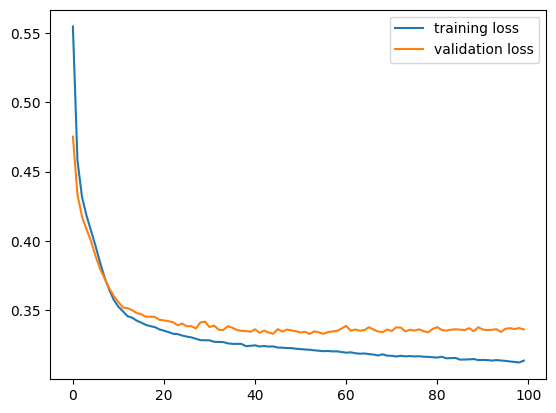

In [64]:
import matplotlib.pyplot as plt
print(type(hist))

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()